In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

### Data Collection

In [2]:
import requests

url = "https://soccer-football-info.p.rapidapi.com/matches/day/basic/"

querystring = {"d":"20220615","p":"1","l":"en_US"}

headers = {
	"X-RapidAPI-Key": "2a72581d9dmsh7b7f5151a742246p10e04fjsn593e4f302290",
	"X-RapidAPI-Host": "soccer-football-info.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)



In [3]:
res= response.json()

In [4]:
type(response)

requests.models.Response

In [5]:
type(res)

dict

In [6]:
res['result'][0]

{'id': '656c49d15deaa8e3',
 'date': '2022-06-15 00:00:00',
 'status': 'POSTPONE',
 'timer': '00:00',
 'championship': {'id': 'b750e9d4bd8ace62',
  'name': 'Ecuador Primera B',
  's_name': 'Serie B 2022'},
 'teamA': {'id': 'bd7fefd2ccf6ec8b',
  'name': 'El Nacional',
  'score': {'f': None, '1h': None, '2h': None, 'o': None, 'p': None},
  'manager': None},
 'teamB': {'id': 'e9ea81382d74c42d',
  'name': 'Atletico Santo Domingo',
  'score': {'f': None, '1h': None, '2h': None, 'o': None, 'p': None},
  'manager': None},
 'referee': None,
 'stadium': {'id': '97b49b620c21c60c', 'name': 'Olimpico Atahualpa'}}

In [7]:
res['result'][1]['teamA']['stats']

{'possession': '38',
 'attacks': {'n': '99', 'd': '42', 'o_s': None},
 'shoots': {'t': '7', 'off': '5', 'on': '2', 'g_a': None},
 'penalties': '0',
 'corners': {'t': '4', 'f': '4', 'h': '2'},
 'fouls': {'t': None, 'y_c': '3', 'y_t_r_c': '0', 'r_c': '0'},
 'substitutions': '1',
 'throwins': None,
 'injuries': '3',
 'dominance_avg_2_5': None}

In [8]:
data=pd.DataFrame()

In [9]:
start_date= datetime.datetime.strptime('2022-06-15',"%Y-%m-%d")

k=150

date_range= pd.date_range(start_date,periods=k)

In [10]:
date=[]
tournament=[]
team1=[]
team1_goals=[]
team1_shoots=[]
team1_penalties=[]
team1_corners=[]
team1_injuries=[]

team2=[]
team2_goals=[]
team2_shoots=[]
team2_penalties=[]
team2_corners=[]
team2_injuries=[]

for d in date_range:
    url = "https://soccer-football-info.p.rapidapi.com/matches/day/basic/"
    querystring = {"d":d.strftime('%Y%m%d'),"p":"1","l":"en_US"}

    headers = {
        "X-RapidAPI-Key": "2a72581d9dmsh7b7f5151a742246p10e04fjsn593e4f302290",
        "X-RapidAPI-Host": "soccer-football-info.p.rapidapi.com"
    }

    response = requests.request("GET", url, headers=headers, params=querystring)
    res= response.json()

    for item in res['result']:
        if item['status']=='ENDED':
            date.append(item['date'])
            tournament.append(item['championship']['name'])
            team1.append(item['teamA']['name'])
            team1_goals.append(item['teamA']['score']['f'])
            team1_shoots.append(item['teamA']['stats']['shoots']['t'])
            team1_penalties.append(item['teamA']['stats']['penalties'])

            team2.append(item['teamB']['name'])
            team2_goals.append(item['teamB']['score']['f'])
            team2_shoots.append(item['teamB']['stats']['shoots']['t'])
            team2_penalties.append(item['teamB']['stats']['penalties'])
            
    


In [11]:
columns=['date','tournament','home_team','home_team_goals','home_team_shoots','home_team_penalties','away_team','away_team_goals','away_team_shoots','away_team_penalties']
values= [date,tournament,team1,team1_goals,team1_shoots,team1_penalties,team2,team2_goals,team2_shoots,team2_penalties]
for col,val in zip(columns,values):
    data[col]=val

In [12]:
data.head()

,date,tournament,home_team,home_team_goals,home_team_shoots,home_team_penalties,away_team,away_team_goals,away_team_shoots,away_team_penalties
0,2022-06-15 00:00:00,CONCACAF Nations League,Jamaica,1,7,0,Mexico,1,20,0
1,2022-06-15 00:10:00,Argentina Nacional B,Ferro Carril Oeste,1,9,0,CA Atlanta,0,15,0
2,2022-06-15 00:30:00,Brazil Serie A,EC Juventude,1,10,0,Santos,2,18,0
3,2022-06-15 00:30:00,USA NPSL,Coyotes FC,0,13,0,Fort Worth Vaqueros FC,3,8,1
4,2022-06-15 00:30:00,Argentina Liga Profesional,Estudiantes LP,2,12,1,Sarmiento,1,11,0


In [13]:
data.to_csv('api_cleaned.csv')

In [3]:
df=pd.read_csv('international_matches.csv')

In [4]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [7]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


### Data Cleaning

In [8]:
df['home_team'].value_counts()

Mexico                      316
USA                         314
Japan                       280
Saudi Arabia                272
Korea Republic              249
                           ... 
Timor-Leste                  16
Tonga                        15
Anguilla                     13
Cook Islands                 10
Turks and Caicos Islands      8
Name: home_team, Length: 211, dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
#let's re-shape the data a bit
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')
#fifa_points_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nlargest(10, 'rank_points') 

#let's see the 5 strongest teams
fifa_rank_top

/var/folders/nt/22h8c0cx5qvc176tly0bnp0h0000gn/T/ipykernel_36260/3936163039.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_rank = home.append(away)


,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [11]:
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)
# offense
#last match that each country played
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
offense_top_data

/var/folders/nt/22h8c0cx5qvc176tly0bnp0h0000gn/T/ipykernel_36260/2376855644.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  offense  = home.append(away)


,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


In [12]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

Text(0, 0.5, 'FIFA Points')

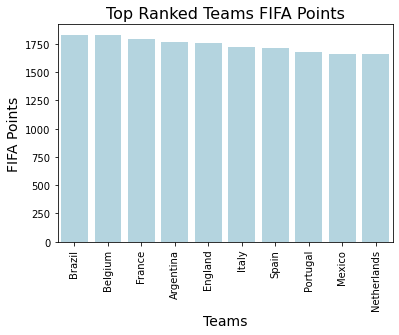

In [13]:
sns.barplot(data=fifa_rank_top,x='team',y='rank_points',color='lightblue')
plt.xticks(rotation=90);
plt.title('Top Ranked Teams FIFA Points',fontsize=16)
plt.xlabel('Teams',fontsize=14)
plt.ylabel('FIFA Points',fontsize=14)

The bar graph plots the data of top 10 ranked team and their respective FIFA points. It can be inferred from the graph that Brazil has the highest number of FIFA points followed by Belgium, France and Argentina. Among the Top 10 teams Netherlands has the lowest points.

In [14]:
brazil_df= df[df['home_team']=='Brazil'][['date','home_team_fifa_rank']]
brazil_df

,date,home_team_fifa_rank
1,1993-08-08,8
17,1993-08-22,8
23,1993-08-29,8
28,1993-09-05,8
49,1993-09-19,8
...,...,...
22999,2021-09-09,2
23159,2021-10-14,2
23199,2021-11-11,2
23456,2022-02-01,2


In [15]:
brazil_df['year']= df['date'].dt.year

In [16]:
brazil_df

,date,home_team_fifa_rank,year
1,1993-08-08,8,1993
17,1993-08-22,8,1993
23,1993-08-29,8,1993
28,1993-09-05,8,1993
49,1993-09-19,8,1993
...,...,...,...
22999,2021-09-09,2,2021
23159,2021-10-14,2,2021
23199,2021-11-11,2,2021
23456,2022-02-01,2,2022


In [17]:
brazil_df.drop_duplicates(subset=['home_team_fifa_rank','year'],inplace=True)

Text(0, 0.5, 'Rank')

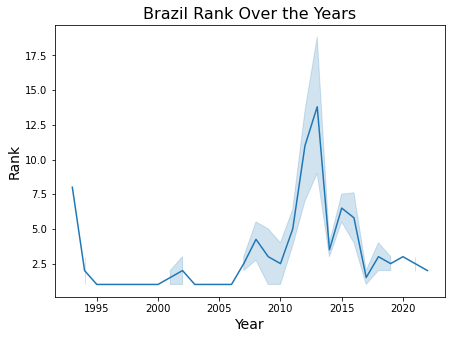

In [18]:
plt.figure(figsize=(7,5))
sns.lineplot(data=brazil_df, x='year',y='home_team_fifa_rank')
plt.title('Brazil Rank Over the Years',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Rank',fontsize=14)

The line plot shows the rank of Brazil over the years. It can be observed that Brazil was ranked No.1 Team from 1995-2000 and was in top 5 teams till 2010. It can see a spike after 2010 the rank of Brazil has decreased and improved it's rank again after 2015.

Text(0, 0.5, 'FIFA Points')

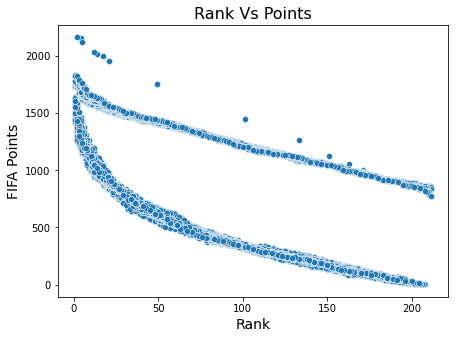

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df[df['home_team_total_fifa_points']!=0],x='home_team_fifa_rank',y='home_team_total_fifa_points')
plt.title('Rank Vs Points',fontsize=16)
plt.xlabel('Rank',fontsize=14)
plt.ylabel('FIFA Points',fontsize=14)

The Scatterplot shows the relationship the teams rank and points. We can clearly observe that there is negative correlation between the two variables. For the teams that have lower rank has high points and as the rank is increasing the points of the team tend to be decreasing.

Text(0, 0.5, 'Count')

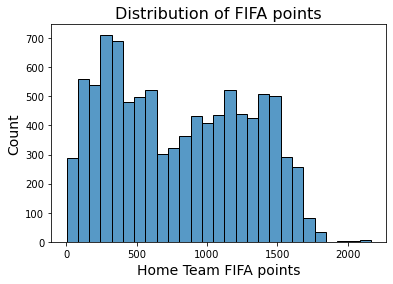

In [20]:
sns.histplot(df[df['home_team_total_fifa_points']!=0]['home_team_total_fifa_points'])
plt.title("Distribution of FIFA points",fontsize=16)
plt.xlabel("Home Team FIFA points",fontsize=14)
plt.ylabel("Count",fontsize=14)

The distribution of FIFA points has a bi-modal graph. The plot has two peak regions one is around 500 and the other is around 1500. There are few data points above 2000 which are present in the tail of the graph.

/Users/vineethreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '')

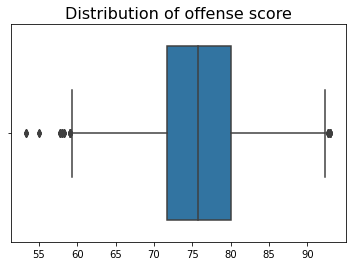

In [21]:
sns.boxplot(df['home_team_mean_offense_score'])
plt.title('Distribution of offense score',fontsize=16)
plt.xlabel(None)

The Boxplot shows the distribution of the Team's Offense Score. From the graph, we can say that the most of offense score values are in the range of 70-80. There are few outliers in the data as well i.e the values below 60 and values above 95 are considered as outliers. The Mean value of offense score is around 75. 

/Users/vineethreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '')

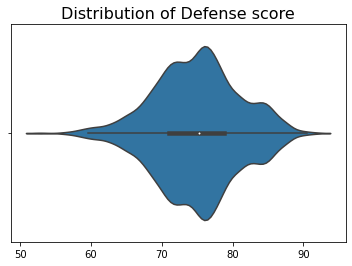

In [22]:
sns.violinplot(df['home_team_mean_defense_score'])
plt.title('Distribution of Defense score',fontsize=16)
plt.xlabel(None)

The defense score distribution is almost a normal distribution. The mean value is around 75 and the other points are ditributed almost symmetrically on eithe side of the mean.

Text(0.5, 1.05, 'Heatmap')

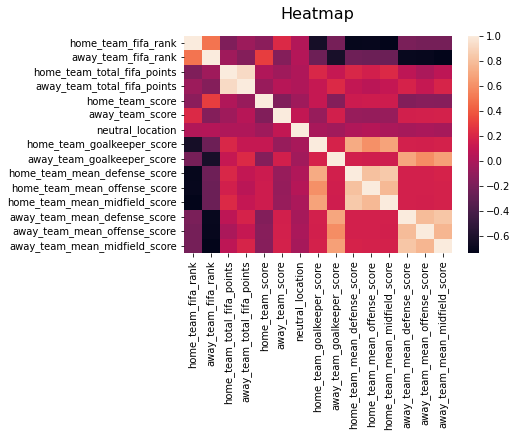

In [23]:
sns.heatmap(df.corr())
plt.title('Heatmap',fontsize=16,y=1.05)


The Heatmap here shows the correlation between various variables. We could observe that there is a high correlation between variables such as team defense score and team midfield score, team goalkeeper score and midfield score etc.

<Figure size 504x360 with 0 Axes>

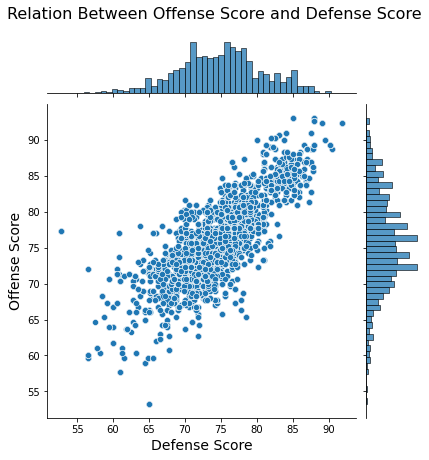

In [24]:
plt.figure(figsize=(7,5))
p=sns.jointplot(x=df['home_team_mean_defense_score'],y=df['home_team_mean_offense_score']);

p.fig.suptitle("Relation Between Offense Score and Defense Score",y=1.05,fontsize=16)
p.set_axis_labels('Defense Score', 'Offense Score', fontsize=14)

The JointPlot shows the relation the Offense Score and Defense Score and also plots individual histograms of each variable.  There is a positive correlation between the two variables. The teams with high defense score has high offense score as well and similarly teams with low defense score has low offense score. The distribution of the variables is almost a normal distribution.

In [25]:
result=df['home_team_result'].value_counts()

Text(0.5, 1.0, 'Record of Home Teams')

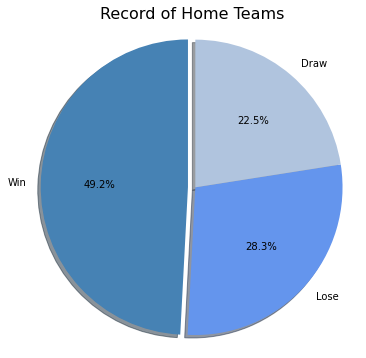

In [26]:
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(result.values, labels=result.index, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['steelblue','cornflowerblue','lightsteelblue'],explode=(0.05,0,0))
ax1.axis('equal');
plt.title("Record of Home Teams",fontsize=16)

The Pie Chart shows the record the Home Team performance. Based on the chart, we can see that 49.2% of matches played at home venue Won by the home team whereas 22.5% resulted in  Draw and 28.3% matches were on losing side. It is evident that there is an advantage for the teams playing at home and they have an high chance of winning the match.

In [27]:
df.drop(columns=['home_team_goalkeeper_score','away_team_goalkeeper_score','home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score','away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score'],inplace=True,axis=1)

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         23921 non-null  datetime64[ns]
 1   home_team                    23921 non-null  object        
 2   away_team                    23921 non-null  object        
 3   home_team_continent          23921 non-null  object        
 4   away_team_continent          23921 non-null  object        
 5   home_team_fifa_rank          23921 non-null  int64         
 6   away_team_fifa_rank          23921 non-null  int64         
 7   home_team_total_fifa_points  23921 non-null  int64         
 8   away_team_total_fifa_points  23921 non-null  int64         
 9   home_team_score              23921 non-null  int64         
 10  away_team_score              23921 non-null  int64         
 11  tournament                   23921 non-nu

### Unlabelled Data

In [30]:
y= df.iloc[:,-1]
y

0         Win
1        Draw
2         Win
3         Win
4        Lose
         ... 
23916     Win
23917    Lose
23918    Lose
23919    Lose
23920     Win
Name: home_team_result, Length: 23921, dtype: object

In [31]:
unlabelled_df = df.iloc[:,:-1]

In [32]:
unlabelled_df["neutral_location"] = unlabelled_df["neutral_location"].astype(int)

In [33]:
# selecting numeric data

unlabelled_num_df = unlabelled_df.select_dtypes(exclude=['object','datetime'])

In [34]:
unlabelled_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   home_team_fifa_rank          23921 non-null  int64
 1   away_team_fifa_rank          23921 non-null  int64
 2   home_team_total_fifa_points  23921 non-null  int64
 3   away_team_total_fifa_points  23921 non-null  int64
 4   home_team_score              23921 non-null  int64
 5   away_team_score              23921 non-null  int64
 6   neutral_location             23921 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB


In [35]:
unlabelled_num_df

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location
0,59,22,0,0,3,1,0
1,8,14,0,0,1,1,0
2,35,94,0,0,5,0,0
3,65,86,0,0,1,0,0
4,67,5,0,0,1,3,0
...,...,...,...,...,...,...,...
23916,180,153,932,1040,2,1,0
23917,192,135,895,1105,0,2,0
23918,28,60,1526,1387,0,0,1
23919,23,35,1553,1499,0,3,0


In [36]:
cols= unlabelled_num_df.columns

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(unlabelled_num_df)

In [38]:
normalized_df = pd.DataFrame(scaled_array, columns=cols)

In [39]:
normalized_df.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location
0,-0.360138,-1.104554,-0.64575,-0.642558,0.853195,-0.054012,-0.576948
1,-1.334273,-1.254840,-0.64575,-0.642558,-0.373729,-0.054012,-0.576948
2,-0.818554,0.248021,-0.64575,-0.642558,2.080119,-0.845202,-0.576948
3,-0.245533,0.097735,-0.64575,-0.642558,-0.373729,-0.845202,-0.576948
4,-0.207332,-1.423912,-0.64575,-0.642558,-0.373729,1.528370,-0.576948


In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [97]:
silhouette_score_ = [ ]
sum_of_sq_dist = {}
range_n_clusters = [i for i in range(2,10)]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10,random_state=10)
    preds = clusterer.fit_predict(unlabelled_num_df)
    centers = clusterer.cluster_centers_
    sum_of_sq_dist[n_clusters] = clusterer.inertia_

    score = silhouette_score(unlabelled_num_df, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])

In [98]:
kmeans = pd.DataFrame(silhouette_score_ , columns = ["No of Clusters" , "Silhouette Score"])

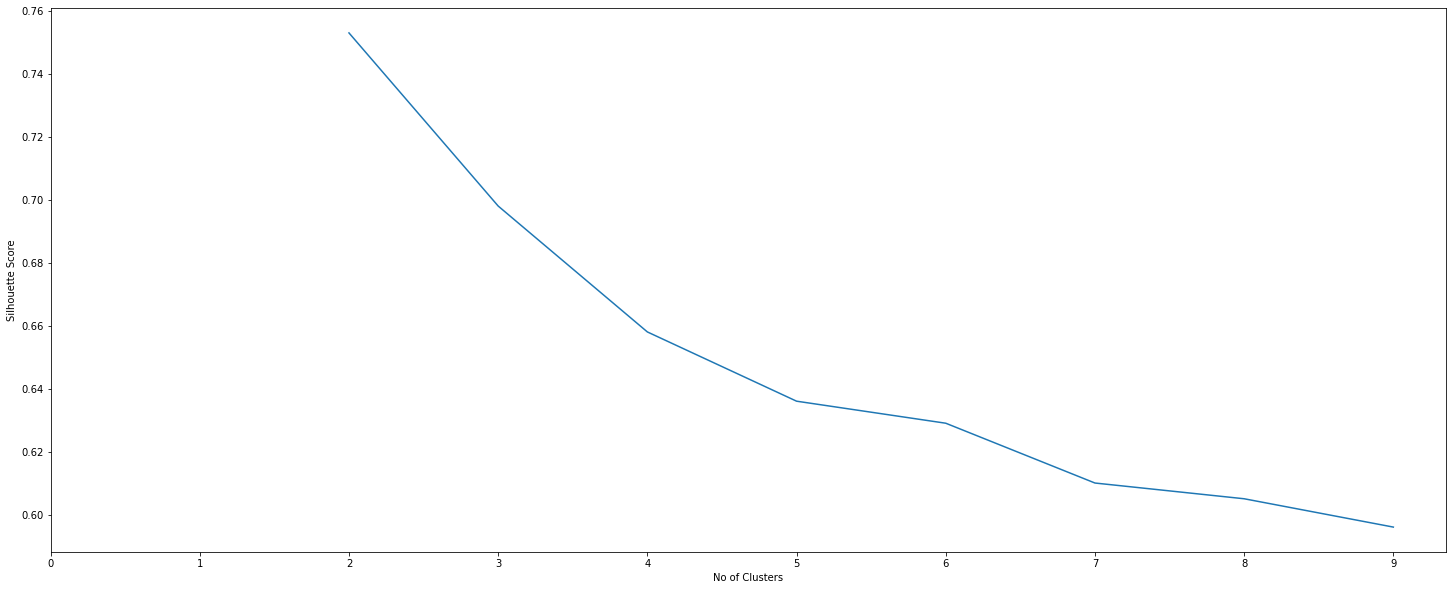

In [100]:
plt.figure(figsize=(25,10))
_ = sns.lineplot(x = kmeans['No of Clusters'], y = kmeans['Silhouette Score'])
_ = plt.xticks(ticks = np.arange(0,10,1))

In [101]:
kmeans.sort_values(['Silhouette Score','No of Clusters'],ascending=False).head()

,No of Clusters,Silhouette Score
0,2,0.753
1,3,0.698
2,4,0.658
3,5,0.636
4,6,0.629


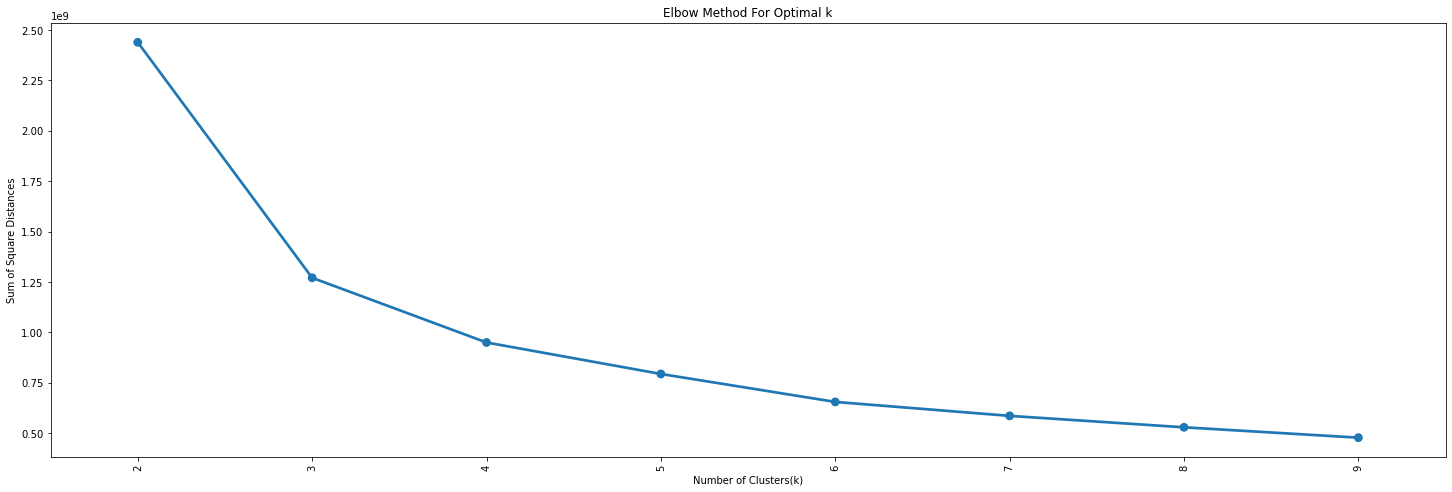

In [102]:
plt.figure(figsize=(25,8))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.xticks(rotation = 90)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.29690297975727153
For n_clusters = 3 The average silhouette_score is : 0.21154452988464476
For n_clusters = 4 The average silhouette_score is : 0.22811499415894868


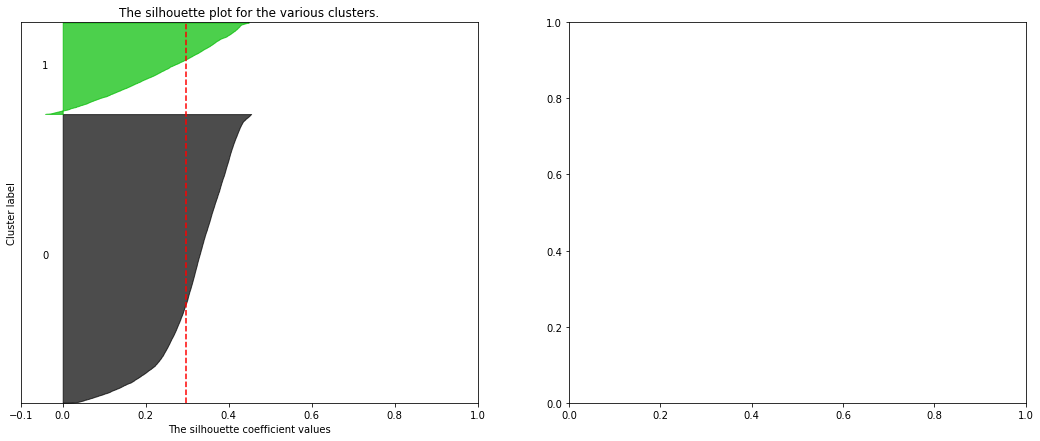

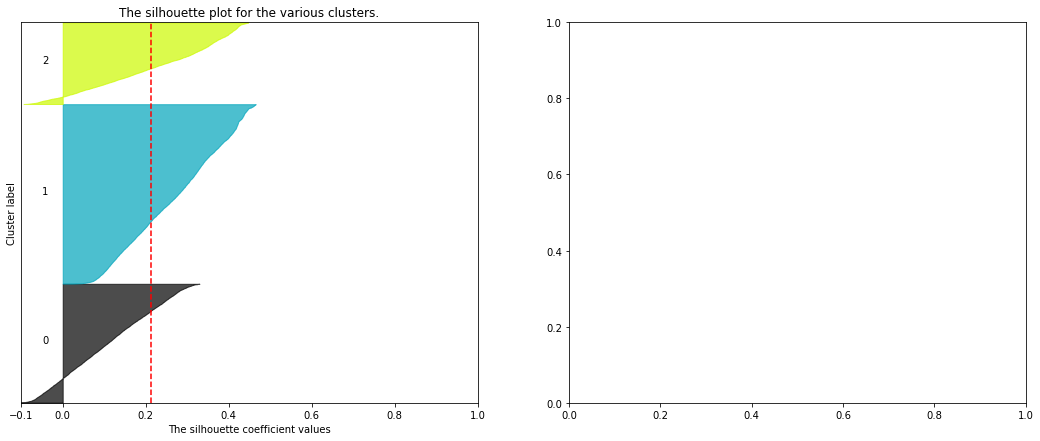

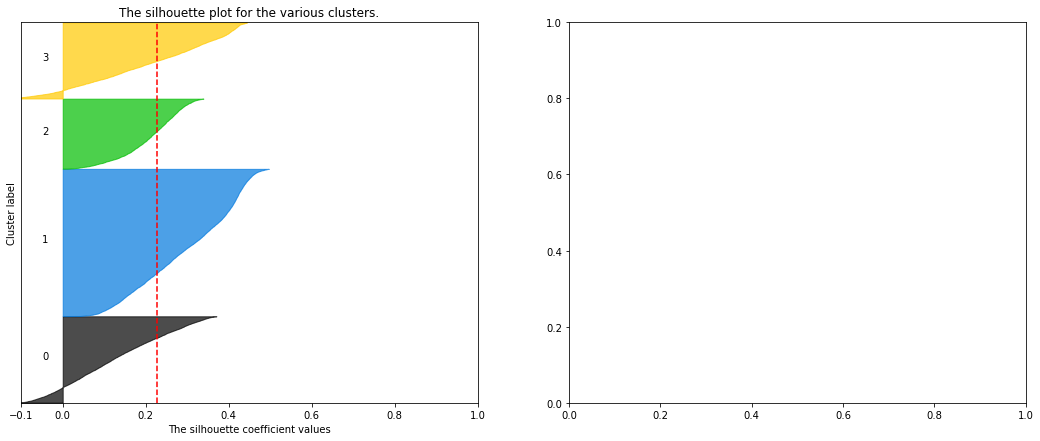

In [77]:
range_n_clusters = [i for i in range(2,5)]
import matplotlib.cm as cm
                          
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(normalized_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(normalized_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(normalized_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

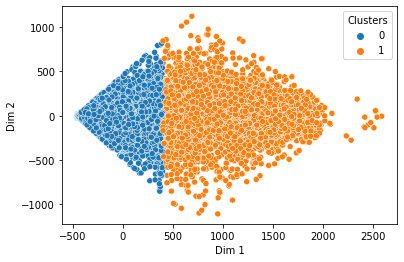

In [109]:
clusterer = KMeans(n_clusters= 2, n_init=10,random_state=10)
preds = clusterer.fit_predict(unlabelled_num_df)
predictions = pd.DataFrame(preds, columns = ['Clusters'])
pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(unlabelled_num_df), columns = ['Dim 1', 'Dim 2'])
kmeans_cluster = pd.concat([reduced, predictions], axis=1)
sns.scatterplot(x = 'Dim 1', y = 'Dim 2', data = kmeans_cluster, hue = 'Clusters')

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

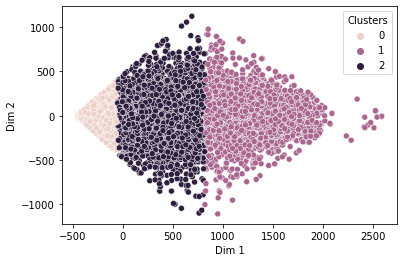

In [108]:
clusterer = KMeans(n_clusters= 3, n_init=10,random_state=10)
preds = clusterer.fit_predict(unlabelled_num_df)
predictions = pd.DataFrame(preds, columns = ['Clusters'])
pca = PCA(n_components = 3)
reduced = pd.DataFrame(pca.fit_transform(unlabelled_num_df), columns = ['Dim 1', 'Dim 2','Dim 3'])
kmeans_cluster = pd.concat([reduced, predictions], axis=1)
sns.scatterplot(x = 'Dim 1', y = 'Dim 2', data = kmeans_cluster, hue = 'Clusters')

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

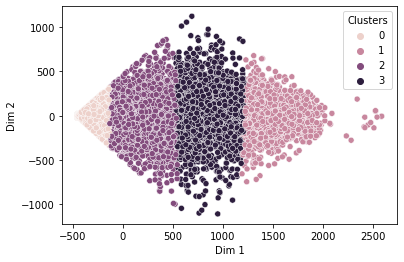

In [105]:
clusterer = KMeans(n_clusters= 4, n_init=10,random_state=10)
preds = clusterer.fit_predict(unlabelled_num_df)
predictions = pd.DataFrame(preds, columns = ['Clusters'])
pca = PCA(n_components = 4)
reduced = pd.DataFrame(pca.fit_transform(unlabelled_num_df), columns = ['Dim 1', 'Dim 2','Dim 3','Dim 4'])
kmeans_cluster = pd.concat([reduced, predictions], axis=1)
sns.scatterplot(x = 'Dim 1', y = 'Dim 2', data = kmeans_cluster, hue = 'Clusters')

### Decision Tree

In [40]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

cat_col = X.select_dtypes(include="object").columns
cat_col

Index(['home_team', 'away_team', 'home_team_continent', 'away_team_continent',
       'tournament', 'city', 'country', 'shoot_out'],
      dtype='object')

In [41]:
X = pd.get_dummies(X, columns=cat_col)

In [42]:
X.drop("date",inplace=True,axis=1)

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [34]:
X_train.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,home_team_Afghanistan,home_team_Albania,home_team_Algeria,...,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe,shoot_out_No,shoot_out_Yes
8581,120,153,0,0,0,1,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10645,41,16,0,0,2,0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8538,175,183,0,0,0,1,True,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19916,90,91,391,391,4,1,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6301,49,64,0,0,4,1,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
y_train

8581     Lose
10645     Win
8538     Lose
19916     Win
6301      Win
         ... 
15688    Draw
22644     Win
17841    Lose
9500     Lose
123       Win
Name: home_team_result, Length: 19136, dtype: object

In [36]:
X_test.head()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,neutral_location,home_team_Afghanistan,home_team_Albania,home_team_Algeria,...,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe,shoot_out_No,shoot_out_Yes
12659,2,114,0,0,3,0,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8593,113,106,0,0,2,1,True,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18176,43,121,650,280,3,1,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1882,54,21,0,0,0,4,False,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19337,156,136,170,221,1,1,True,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
y_test

12659     Win
8593      Win
18176     Win
1882     Lose
19337    Draw
         ... 
20053    Draw
15527     Win
5753      Win
15335     Win
5138      Win
Name: home_team_result, Length: 4785, dtype: object

In [38]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

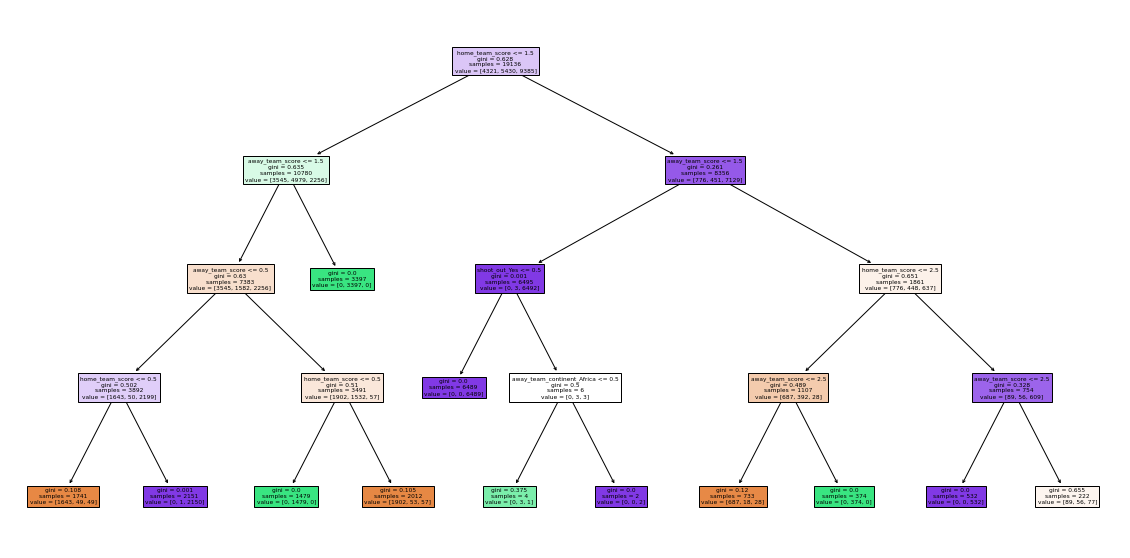

In [39]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [41]:
preds= clf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)

Text(114.0, 0.5, 'True')

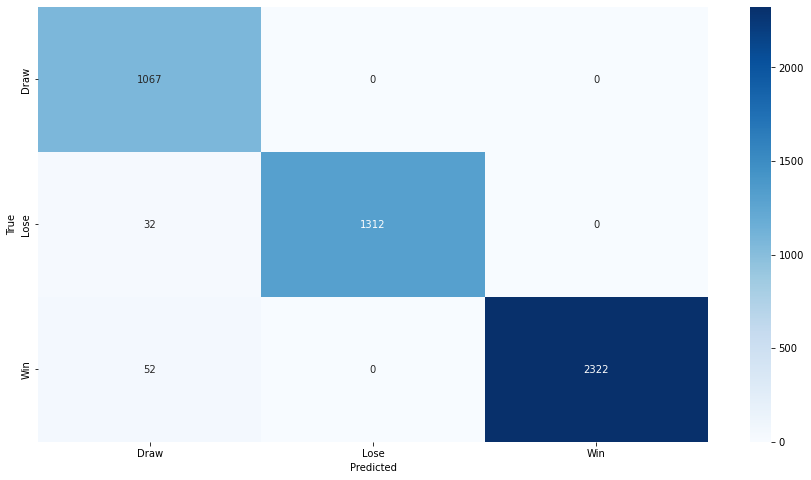

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Draw', 'Lose', 'Win'], yticklabels=['Draw', 'Lose', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')

In [51]:
pd.Series(y_test).value_counts()

Win     2374
Lose    1344
Draw    1067
Name: home_team_result, dtype: int64

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.9824451410658307

### Updating Hyperparameters

In [45]:
clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

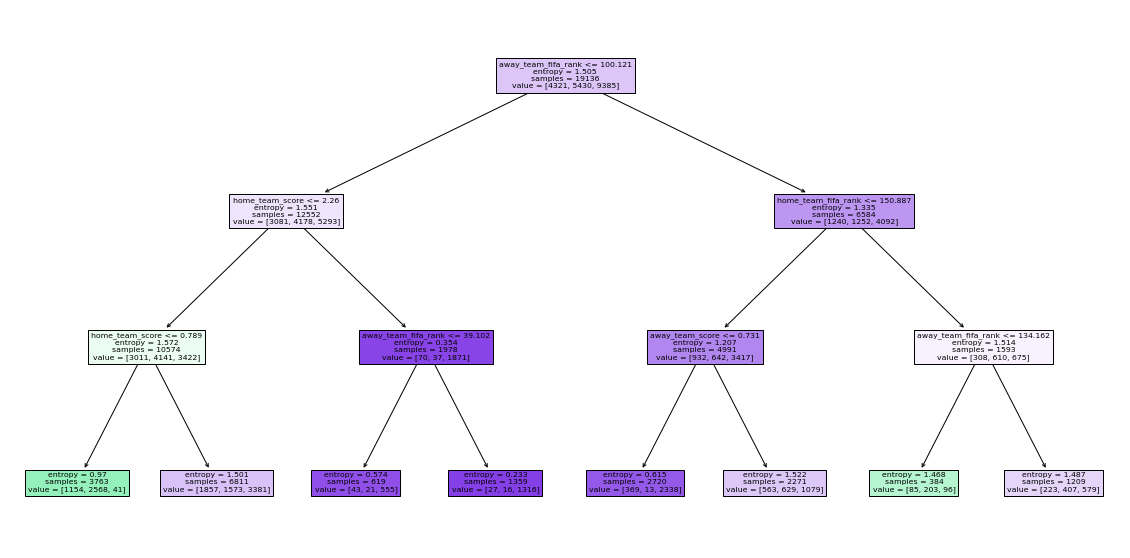

In [46]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [49]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

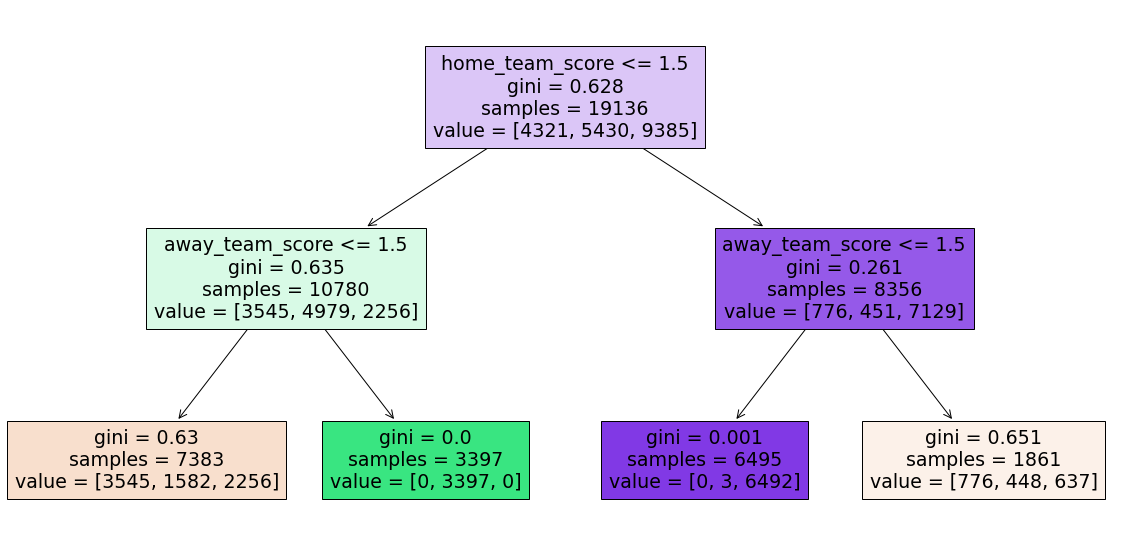

In [50]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

### SVM

#### RBF Kernel

In [46]:
from sklearn.svm import SVC

In [47]:
svm = SVC()

In [48]:
svm.fit(X_train,y_train)

SVC()

In [49]:
svm_pred = svm.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred)

In [87]:
confusion_matrix(y_test, svm_pred)

array([[   0,  288,  769],
       [   0,  633,  744],
       [   0,  207, 2144]])

Text(114.0, 0.5, 'True')

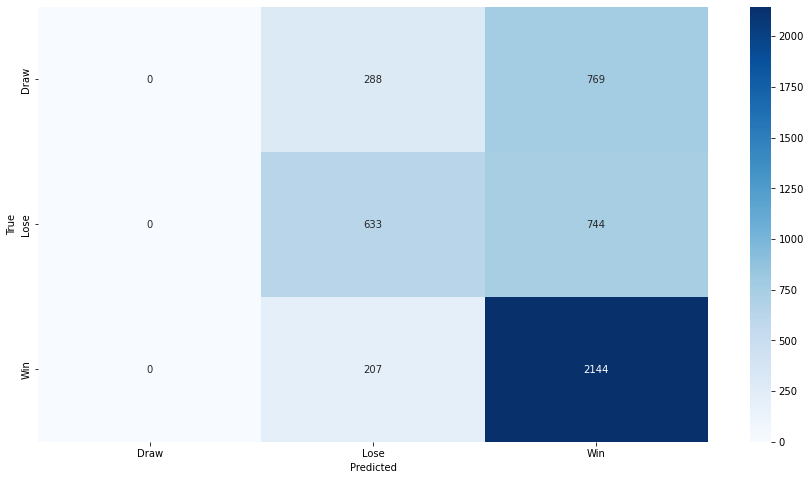

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Draw', 'Lose', 'Win'], yticklabels=['Draw', 'Lose', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,svm_pred)

0.5803552769070011

#### Tuning the C Parameter

In [60]:
svm= SVC(kernel='rbf',C=0.8)

In [61]:
svm.fit(X_train,y_train)

SVC(C=0.8)

In [62]:
svm_pred_1= svm.predict(X_test)

In [63]:
cm = confusion_matrix(y_test, svm_pred_1)

Text(114.0, 0.5, 'True')

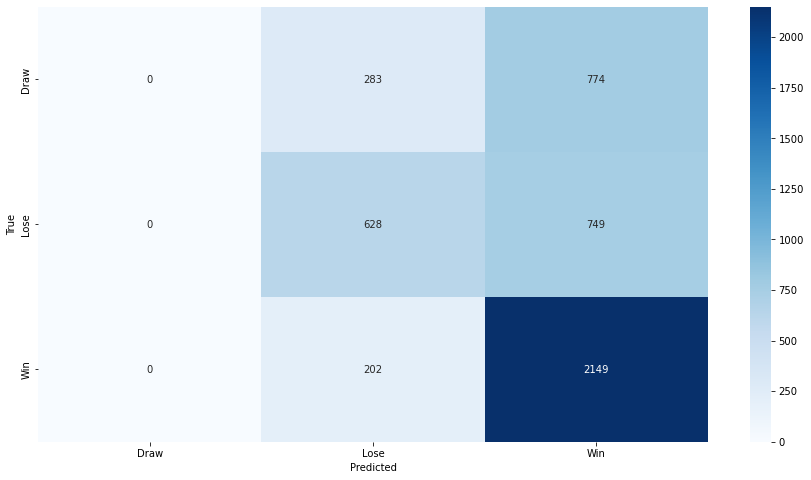

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Draw', 'Lose', 'Win'], yticklabels=['Draw', 'Lose', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')

In [65]:
accuracy_score(y_test,svm_pred_1)

0.5803552769070011

In [66]:
svm= SVC(kernel='rbf',C=1.2)

In [67]:
svm.fit(X_train,y_train)

SVC(C=1.2)

In [75]:
svm_pred_2= svm.predict(X_test)

In [76]:
cm = confusion_matrix(y_test, svm_pred_2)

In [78]:
cm

array([[   0,  295,  762],
       [   0,  639,  738],
       [   0,  210, 2141]])

In [79]:
accuracy_score(y_test,svm_pred_2)

0.58098223615465

#### Polynomial Kernel

In [54]:
svm_poly= SVC(kernel='poly')

In [55]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [56]:
svm_poly_pred= svm_poly.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, svm_poly_pred)

Text(114.0, 0.5, 'True')

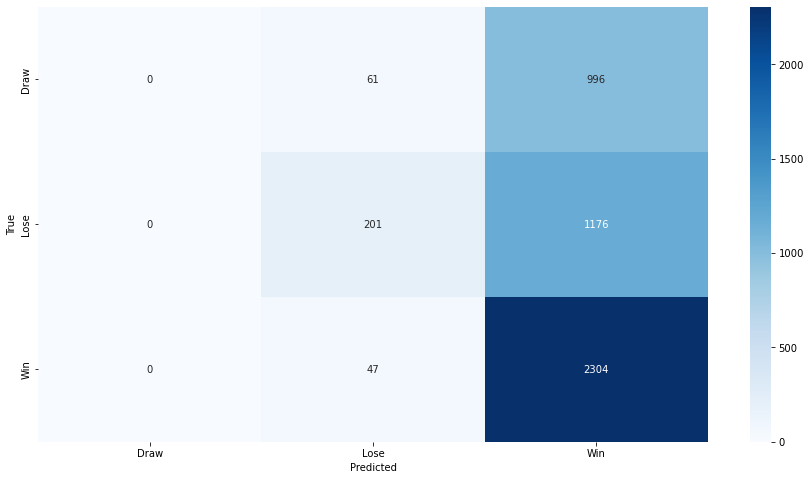

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Draw', 'Lose', 'Win'], yticklabels=['Draw', 'Lose', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')

In [59]:
accuracy_score(y_test,svm_poly_pred)

0.5235109717868338

In [80]:
svm_poly= SVC(kernel='poly',C=0.8)

In [81]:
svm_poly.fit(X_train,y_train)

SVC(C=0.8, kernel='poly')

In [82]:
svm_poly_pred_1= svm_poly.predict(X_test)

In [83]:
confusion_matrix(y_test, svm_poly_pred_1)

array([[   0,   59,  998],
       [   0,  194, 1183],
       [   0,   48, 2303]])

In [84]:
accuracy_score(y_test,svm_poly_pred_1)

0.5218390804597701

In [85]:
svm_poly= SVC(kernel='poly',C=1.2)

In [86]:
svm_poly.fit(X_train,y_train)

SVC(C=1.2, kernel='poly')

In [88]:
svm_poly_pred_2= svm_poly.predict(X_test)

In [89]:
cm = confusion_matrix(y_test, svm_poly_pred_2)

Text(114.0, 0.5, 'True')

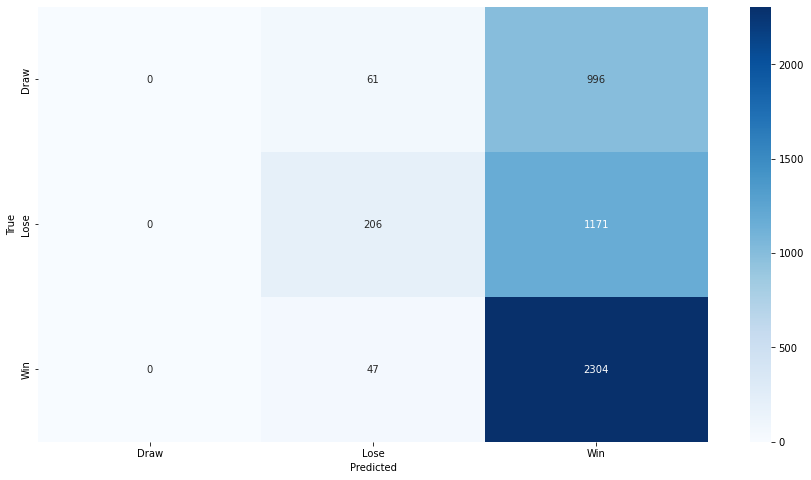

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Draw', 'Lose', 'Win'], yticklabels=['Draw', 'Lose', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')

In [91]:
accuracy_score(y_test,svm_poly_pred_2)

0.5245559038662487

#### Linear Kernel

In [93]:
svm_lin= SVC(kernel='linear')

In [94]:
svm_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [95]:
y_pred_lin = svm_lin.predict(X_test)

In [96]:
cm = confusion_matrix(y_test, y_pred_lin)

Text(114.0, 0.5, 'True')

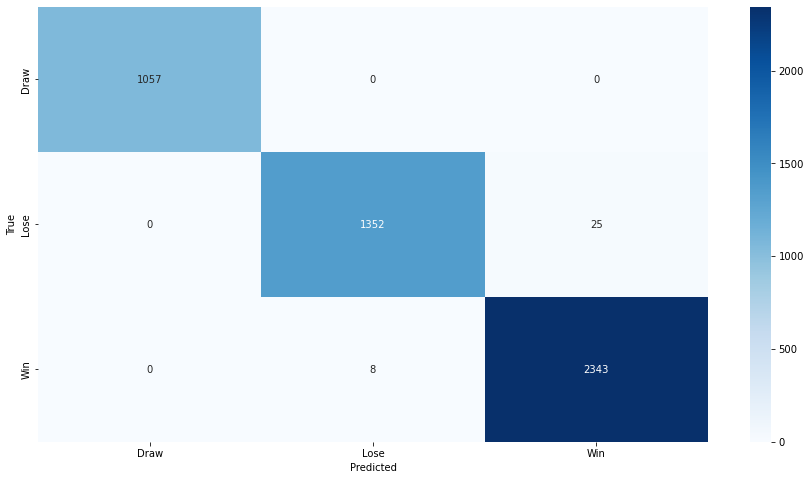

In [97]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Draw', 'Lose', 'Win'], yticklabels=['Draw', 'Lose', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')

In [98]:
accuracy_score(y_test,y_pred_lin)

0.993103448275862

In [99]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Fit an SVM model to the reduced data
clf = SVC(kernel='linear')
clf.fit(X_reduced, y_train)

# Create a mesh grid of points to plot the decision boundary
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM with PCA')
plt.show()